# Million Song Exploration

_Author_ : Pierre-Yves

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import h5py as h5
%matplotlib inline

plt.rcParams['figure.figsize'] = (8,6)
sns.set_palette('Dark2')
sns.set_style('whitegrid')

In [5]:
con_simi = sqlite3.connect('MillionSongSubset/AdditionalFiles/subset_artist_similarity.db')
con_term = sqlite3.connect('MillionSongSubset/AdditionalFiles/subset_artist_term.db')
con_meta = sqlite3.connect('MillionSongSubset/AdditionalFiles/subset_track_metadata.db')

cur_simi = con_simi.cursor()
cur_term = con_term.cursor()
cur_meta = con_meta.cursor()

In [11]:
res = con_simi.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print(name[0])

artists
similarity


In [12]:
res = con_term.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print(name[0])

artists
terms
artist_term
mbtags
artist_mbtag


In [13]:
res = con_meta.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print(name[0])

songs


In [29]:
#cur_meta.execute("SELECT *\
#                  FROM songs")
#con_meta.commit()

songs = pd.read_sql_query('SELECT * FROM songs WHERE year!=0',con_meta)

In [30]:
songs.head(5)

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,TRACCVZ128F4291A8A,Deep Sea Creature,SOVLGJY12A8C13FBED,Call of the Mastodon,ARMQHX71187B9890D3,bc5e2ad6-0a4a-4d90-b911-e9a7e6861727,Mastodon,280.21506,0.780462,0.574275,2001
1,TRACCMH128F428E4CD,No Quieras Marcharte,SOGDQZK12A8C13F37C,Adelante,AR2PT4M1187FB55B1A,d54ea4a6-0b9c-4e47-bed0-289ae9ff4037,Los Chichos,191.68608,0.561590,0.420570,1984
2,TRACCVS12903D014F8,Ad Te Clamamus Exsvles Mortva Liberi,SOHCCIA12AC907577F,Pentagrammaton,ARZEWUR1187FB53DC8,0be59867-0da4-4e45-9b64-728cdf25487c,Enthroned,89.15546,0.593416,0.395710,2010
3,TRACCKS128F42B77AE,Murder One,SOBOAQC12A8C13E3E9,BTNHRESURRECTION,ARUZRFN1187B98AC05,2fa45bbb-0efb-4950-9d40-94bf23cbfec1,Bone Thugs-N-Harmony,255.73832,0.815923,0.555138,2000
4,TRACCJA128F149A144,Segredo,SODPNJR12A6D4FA52D,Joao Voz E Violato,AR3THYK1187B999F1F,286ec4c2-b5ca-4f85-b331-280a6d73dd14,João Gilberto,197.19791,0.645192,0.471224,2000


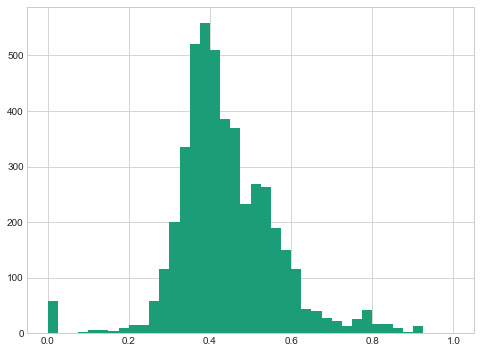

In [31]:
songs.artist_hotttnesss.hist(bins=np.linspace(0.0,1.0,41));

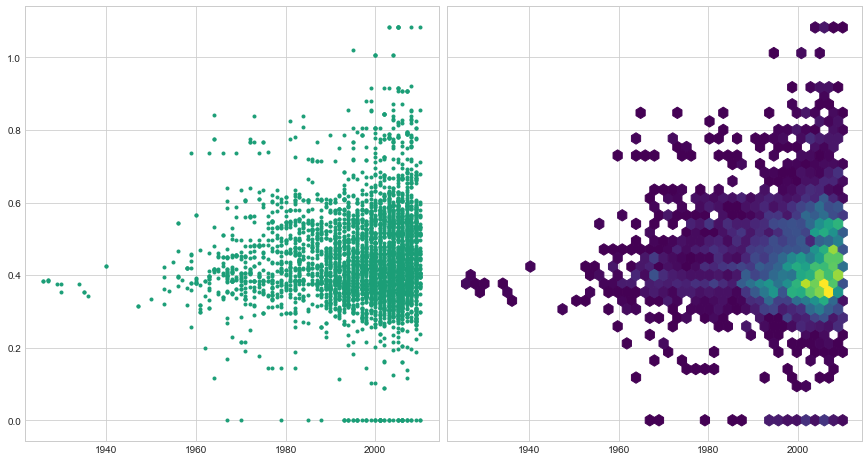

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                       figsize=(15,8))

ax[0].scatter(songs.year, songs.artist_hotttnesss, marker='.')
ax[1].hexbin(songs.year, songs.artist_hotttnesss, cmap='viridis', gridsize=41, mincnt=1.0)

plt.subplots_adjust(wspace=0.02);

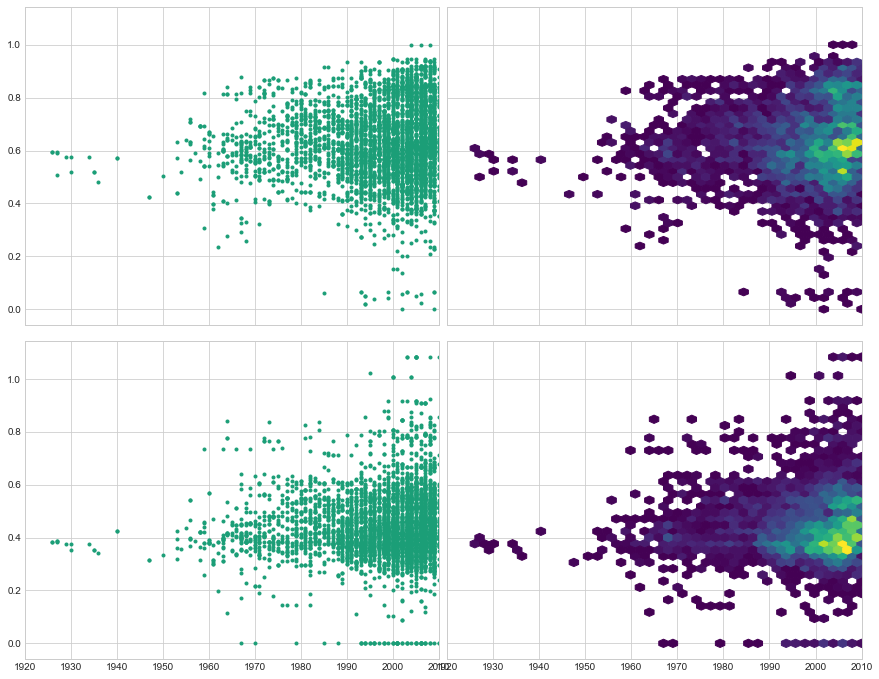

In [79]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                       figsize=(15,12))

ax[0,0].scatter(songs.year, songs.artist_familiarity, marker='.')
ax[0,1].hexbin(songs.year, songs.artist_familiarity, cmap='viridis', gridsize=41, mincnt=1.0)

ax[1,0].scatter(songs.year, songs.artist_hotttnesss, marker='.')
ax[1,1].hexbin(songs.year, songs.artist_hotttnesss, cmap='viridis', gridsize=41, mincnt=1.0)

plt.subplots_adjust(wspace=0.02, hspace=0.05)
ax[-1,-1].set_xlim(1920,songs.year.max());

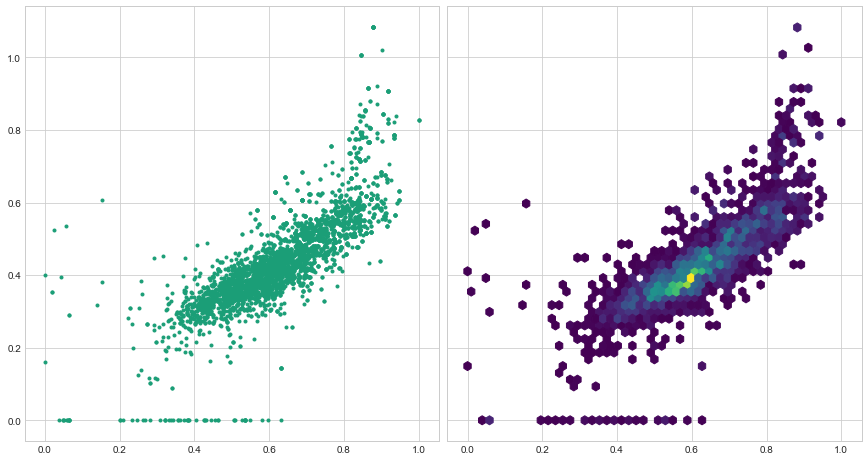

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                       figsize=(15,8))

ax[0].scatter(songs.artist_familiarity, songs.artist_hotttnesss, marker='.')
ax[1].hexbin(songs.artist_familiarity, songs.artist_hotttnesss, cmap='viridis', gridsize=51, mincnt=1.0)

plt.subplots_adjust(wspace=0.02);

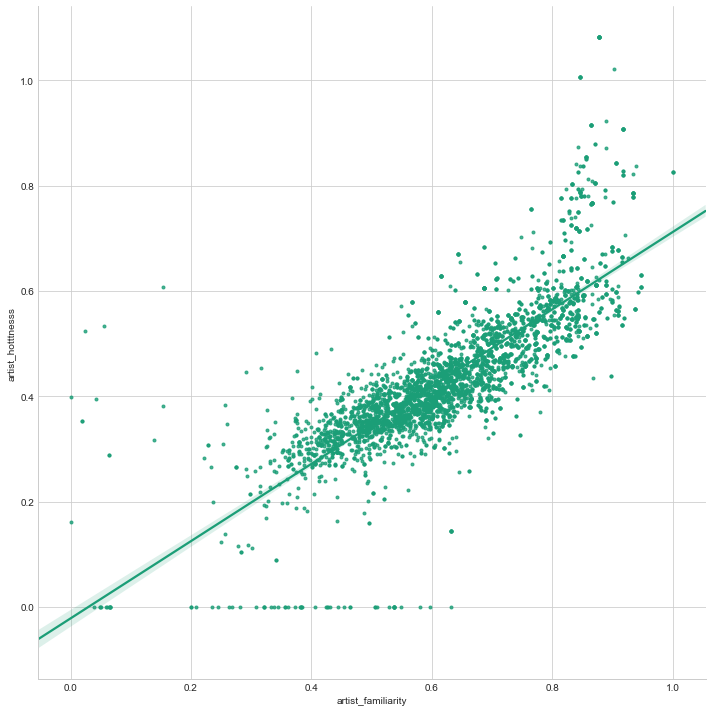

In [72]:
sns.lmplot(data=songs, x='artist_familiarity', y='artist_hotttnesss',
           markers='.', size=10);

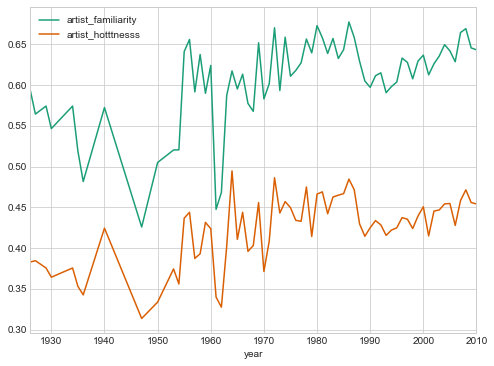

In [87]:
tmp = songs.groupby('year').mean()
tmp[['artist_familiarity','artist_hotttnesss']].plot();